In [1]:
%matplotlib inline
import pylipid
from pylipid.api import LipidInteraction

In [2]:
import sys

In [3]:
import os, sys
import numpy as np
import argparse
from MDAnalysis.analysis.distances import distance_array
from MDAnalysis.analysis.leaflet import LeafletFinder, optimize_cutoff

In [4]:
import matplotlib.pyplot as plt

In [5]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

import mdtraj as md
import numpy as np
import os

import MDAnalysis as mda
import nglview as nv

import pandas as pd

#import gmxapi as gmx

In [6]:
from NACHRA7_annotations import *

In [7]:
traj_note_dic = cg_dic

In [8]:
traj_note_dic

{'traj_note': ['EPJ', 'PNU_EPJ', 'BGT'],
 'load_location': ['../trajectory/CG/EPJ',
  '../trajectory/CG/PNU_EPJ',
  '../trajectory/CG/BGT'],
 'save_location': ['../trajectory/CG/EPJ',
  '../trajectory/CG/PNU_EPJ',
  '../trajectory/CG/BGT']}

In [9]:
def create_md_dataframe():    
    return pd.DataFrame(columns=list(['MD_name', 'residue', 'index', 'resid','chain', 'system','ligand','note']))

In [ ]:
def append_metadata(traj_note, system, location):
    def get_resid(resid, segid, system):
        if segid in ['B','D','F','H','J']:
            if system == 1:
                return resid + 335
            else:
                return resid + 330
        else:
            return resid
    segid_map = {'A':'A','B':'A','C':'B','D':'B','E':'C',
                 'F':'C','G':'D','H':'D','I':'E','J':'E'}
    rep_data = []
    traj_note_split = traj_note.split('_')
    traj = mda.Universe(location + '/cg.pdb',
                        location + '/cg.xtc') 
    md_name = traj_note_split[0]
    ligand = traj_note_split[1:-1] ##in this case
    note = traj_note_split[-1]

    for ind, resid in enumerate(traj.select_atoms('name BB').residues):

        resid_resid = get_resid(resid.resid,resid.segid, system)
        rep_data.append([md_name, resid, ind, resid_resid, segid_map[resid.segid], system, ligand, note])
    return rep_data
    
    
meta_data = Parallel(n_jobs=num_cores)(delayed(append_metadata)(traj_note = traj_note, 
                                                        system = ind,
                                                        location = traj_note_dic['save_location'][ind])
                           for ind, traj_note in enumerate(traj_note_dic['traj_note'])
                           )
md_data = create_md_dataframe()
for i in range(0, len(meta_data)):
    md_data = md_data.append(pd.DataFrame(meta_data[i],columns=md_data.columns),ignore_index=True)
md_data['index'] = md_data['index'].apply(int)
md_data['resid'] = md_data['resid'].apply(int)
md_data['system'] = md_data['system'].apply(int)

In [14]:
def append_duration(lipid, traj_note, system, location):
    duration_data = pd.read_csv(location + '/pylipid_new/Interaction_' + lipid + '/Dataset_' + lipid + '/dataset.csv')
    return duration_data['Duration'].to_numpy()
    

for lipid in ['POPC', 'PIPC', 'POPE', 'PIPE', 'POPA', 'PIPA', 'POP2', 'PIPI', 'CHOL']:
    lipid_data = Parallel(n_jobs=num_cores)(delayed(append_duration)(
                                                            lipid=lipid,
                                                            traj_note = traj_note, 
                                                            system = ind,
                                                            location = traj_note_dic['save_location'][ind])
                               for ind, traj_note in enumerate(traj_note_dic['traj_note'])
                               )


    md_data[lipid + '_duration'] = [x for x in np.hstack(lipid_data) if x is not None]

In [15]:
def append_duration(lipid, traj_note, system, location):
    duration_data = pd.read_csv(location + '/pylipid_new/Interaction_' + lipid + '/Dataset_' + lipid + '/dataset.csv')
    return duration_data['Duration std'].to_numpy()
    

for lipid in ['POPC', 'PIPC', 'POPE', 'PIPE', 'POPA', 'PIPA', 'POP2', 'PIPI', 'CHOL']:
    lipid_data = Parallel(n_jobs=num_cores)(delayed(append_duration)(
                                                            lipid=lipid,
                                                            traj_note = traj_note, 
                                                            system = ind,
                                                            location = traj_note_dic['save_location'][ind])
                               for ind, traj_note in enumerate(traj_note_dic['traj_note'])
                               )

    md_data[lipid + '_duration_std'] = [x for x in np.hstack(lipid_data) if x is not None]

In [16]:
column_data = pd.read_csv(traj_note_dic['save_location'][0] + '/CG/pylipid_new/Interaction_' + 'CHOL' + '/Dataset_' + 'CHOL' + '/dataset.csv').columns

In [17]:
column_data

Index(['Unnamed: 0', 'Residue', 'Residue ID', 'Occupancy', 'Occupancy std',
       'Duration', 'Duration std', 'Lipid Count', 'Lipid Count std', 'Koff',
       'Residence Time', 'R Squared', 'Koff Bootstrap avg'],
      dtype='object')

In [18]:
def append_residence(lipid, traj_note, system, location):
    res_data = pd.read_csv(location + '/pylipid_new/Interaction_' + lipid + '/Dataset_' + lipid + '/dataset.csv')
    return res_data['Residence Time'].to_numpy()
    

for lipid in ['POPC', 'PIPC', 'POPE', 'PIPE', 'POPA', 'PIPA', 'POP2', 'PIPI', 'CHOL']:
    lipid_data = Parallel(n_jobs=num_cores)(delayed(append_residence)(
                                                            lipid=lipid,
                                                            traj_note = traj_note, 
                                                            system = ind,
                                                            location = traj_note_dic['save_location'][ind])
                               for ind, traj_note in enumerate(traj_note_dic['traj_note'])
                               )

    md_data[lipid + '_residence'] = [x for x in np.hstack(lipid_data) if x is not None]

In [19]:
def append_residence(lipid, traj_note, system, location):
    res_data = pd.read_csv(location + '/pylipid_new/Interaction_' + lipid + '/Dataset_' + lipid + '/dataset.csv')
    return res_data['Occupancy'].to_numpy()
    

for lipid in ['POPC', 'PIPC', 'POPE', 'PIPE', 'POPA', 'PIPA', 'POP2', 'PIPI', 'CHOL']:
    lipid_data = Parallel(n_jobs=num_cores)(delayed(append_residence)(
                                                            lipid=lipid,
                                                            traj_note = traj_note, 
                                                            system = ind,
                                                            location = traj_note_dic['save_location'][ind])
                               for ind, traj_note in enumerate(traj_note_dic['traj_note'])
                               )

    md_data[lipid + '_occupancy'] = [x for x in np.hstack(lipid_data) if x is not None]

In [20]:
def append_residence(lipid, traj_note, system, location):
    res_data = pd.read_csv(location + '/pylipid_new/Interaction_' + lipid + '/Dataset_' + lipid + '/dataset.csv')
    return res_data['Lipid Count'].to_numpy()
    

for lipid in ['POPC', 'PIPC', 'POPE', 'PIPE', 'POPA', 'PIPA', 'POP2', 'PIPI', 'CHOL']:
    lipid_data = Parallel(n_jobs=num_cores)(delayed(append_residence)(
                                                            lipid=lipid,
                                                            traj_note = traj_note, 
                                                            system = ind,
                                                            location = traj_note_dic['save_location'][ind])
                               for ind, traj_note in enumerate(traj_note_dic['traj_note'])
                               )

    md_data[lipid + '_lipid_count'] = [x for x in np.hstack(lipid_data) if x is not None]

In [21]:
from manuscript import *

<Figure size 432x288 with 0 Axes>

In [22]:
sns.set(style="ticks",context='paper',font_scale=2.5)

In [23]:
domain_annotations_plot = {'Cys Loop':range(130,140),
                     #'β8-β9 Loop':range(169,175),
                     'M1': range(207,232),
                     'M2': range(235,261),
                        'M3': range(267,298),
                        'MX': range(300,321),
                        'MA': range(331,358),
                        'M4': range(359,390),
                        'MC': range(391,402)}

In [24]:
palette=['#C78E52','#3F5C76','#656855']
labels=['Desensitized','Open','Closed']

In [24]:
md_data.columns

Index(['MD_name', 'residue', 'index', 'resid', 'chain', 'system', 'ligand',
       'note', 'POPC_duration', 'PIPC_duration', 'POPE_duration',
       'PIPE_duration', 'POPA_duration', 'PIPA_duration', 'POP2_duration',
       'PIPI_duration', 'CHOL_duration', 'POPC_duration_std',
       'PIPC_duration_std', 'POPE_duration_std', 'PIPE_duration_std',
       'POPA_duration_std', 'PIPA_duration_std', 'POP2_duration_std',
       'PIPI_duration_std', 'CHOL_duration_std', 'POPC_residence',
       'PIPC_residence', 'POPE_residence', 'PIPE_residence', 'POPA_residence',
       'PIPA_residence', 'POP2_residence', 'PIPI_residence', 'CHOL_residence',
       'POPC_occupancy', 'PIPC_occupancy', 'POPE_occupancy', 'PIPE_occupancy',
       'POPA_occupancy', 'PIPA_occupancy', 'POP2_occupancy', 'PIPI_occupancy',
       'CHOL_occupancy', 'POPC_lipid_count', 'PIPC_lipid_count',
       'POPE_lipid_count', 'PIPE_lipid_count', 'POPA_lipid_count',
       'PIPA_lipid_count', 'POP2_lipid_count', 'PIPI_lipid_count',

In [26]:
from MDAnalysis.lib.util import convert_aa_code

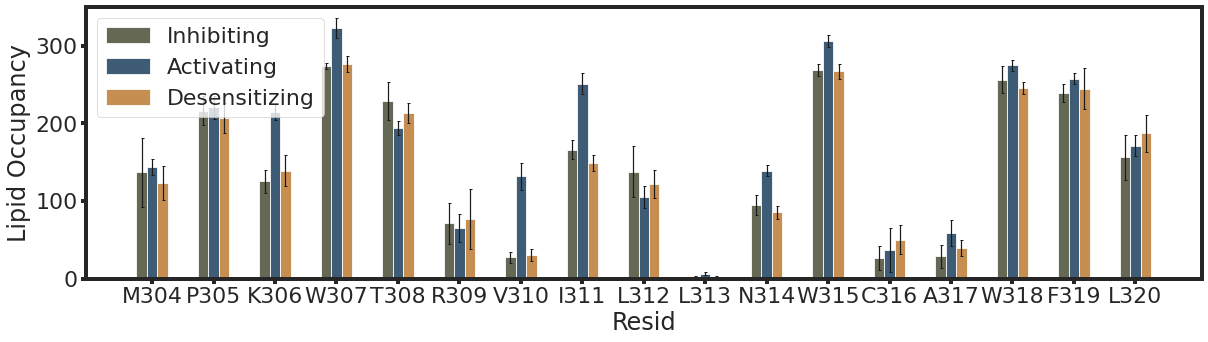

In [28]:
labels = []
occupancy = {0: [],
             1: [],
             2: []}
occupancy_std  = {0: [],
             1: [],
             2: []}
for resid in range(304, 321):
    for sys, df in md_data.groupby(['system']):
        occupancy[sys].append(df[df.resid==resid][['POPC_occupancy', 'PIPC_occupancy', 'POPE_occupancy', 'PIPE_occupancy',
                                 'POPA_occupancy', 'PIPA_occupancy', 'POP2_occupancy', 'PIPI_occupancy', 'CHOL_occupancy']].sum(axis=1).mean())
        occupancy_std[sys].append(df[df.resid==resid][['POPC_occupancy', 'PIPC_occupancy', 'POPE_occupancy', 'PIPE_occupancy',
                                 'POPA_occupancy', 'PIPA_occupancy', 'POP2_occupancy', 'PIPI_occupancy', 'CHOL_occupancy']].sum(axis=1).std())

    labels.append(convert_aa_code(df[df.resid == resid].residue.iloc[0].resname) + str(resid))
fig, ax = plt.subplots(figsize = (20,5))
x = np.arange(len(labels))
width = 0.17

sys_2 = ax.bar(x - width, occupancy[2], width, label='Inhibiting', color=palette[2], yerr=occupancy_std[2], capsize=1.5)
sys_1 = ax.bar(x , occupancy[1], width, label='Activating', color=palette[1], yerr=occupancy_std[1], capsize=1.5)
sys_0 = ax.bar(x + width, occupancy[0], width, label='Desensitizing', color=palette[0], yerr=occupancy_std[0], capsize=1.5)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=2)
set_axis_boarder(ax)
ax.set_ylabel('Lipid Occupancy')
ax.set_xlabel('Resid')
ax.set_ylim(0,350)
plt.savefig('Figures/CG/occupancy_comp.png',bbox_inches = 'tight', pad_inches=0.1, transparent=False)

In [45]:
palette=['#C78E52','#3F5C76','#656855']
labels=['Desensitized','Open','Closed']

In [31]:
domain_annotations_plot = {
                     'M1': range(207,232),
                     'M2': range(235,261),
                        'M3': range(267,298),
                        'MX': range(300,321),
                        'MA': range(331,358),
                        'M4': range(359,390),
                        'MC': range(391,402)}

In [32]:
palette=['#C78E52','#3F5C76','#656855']
labels=['Desensitizing','Activating','Inhibiting']

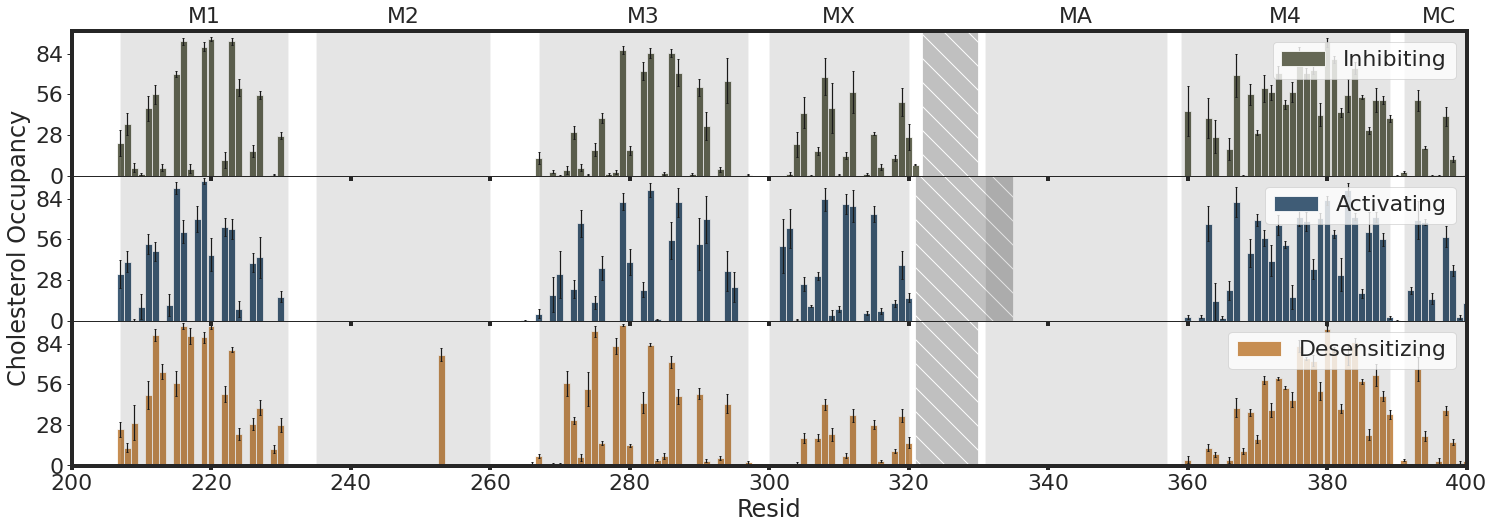

In [33]:
column = 'CHOL_occupancy'
fig = plt.figure(figsize = (25,8))
ax_whole = fig.add_subplot(111)
axes = []
axes.append(fig.add_subplot(313, sharex=ax_whole, sharey=ax_whole))
axes.append(fig.add_subplot(312, sharex=axes[0], sharey=axes[0]))
axes.append(fig.add_subplot(311, sharex=axes[0], sharey=axes[0]))

#axes = plt.subplots(nrows=3, ncols = 1)

for (system, md_data_sys), ax, color, label in zip(md_data.groupby(['system']), axes, palette, labels):

    resid_selection = np.arange(1,402)
    df = md_data_sys[md_data_sys.resid.isin(resid_selection)]
    resid_plot = list(set(df['resid']))
    mean = df.groupby(['resid']).mean()[column]
    sem = df.groupby(['resid']).sem()[column]

    ax.bar(resid_plot, mean, yerr=sem,capsize=1,width=0.99, color=color, label=label)
#    sns.barplot(data=df,
#                x='resid',
#                y='CHOL_residence',
#                capsize = 1,
#                ax=ax)
#    ax.set_xlim(100,402)


    all_resids = np.arange(1,403)
    plot_resids = np.array(list(set(df['resid'])))
    empty_site = np.setdiff1d(all_resids, plot_resids)
    break_points = np.arange(len(empty_site)-1)[np.diff(empty_site) !=1]
    #break_points = empty_site[:-1][np.diff(empty_site) !=1]

    #break_points = np.insert(break_points, 0, empty_site[0], axis=0)
    gray_areas = []
    if break_points.any():
        gray_areas.append([empty_site[0],empty_site[break_points[0]]])
        gray_areas.append([401,500])

        for ind, break_point in enumerate(break_points[:-1]):
            gray_areas.append([empty_site[break_point+1],empty_site[break_points[ind+1]]])
    else: 
        gray_areas.append([empty_site[0],empty_site[-1]])
        gray_areas.append([401,500])

    for gray_area in gray_areas:
        ax.axvspan(gray_area[0], gray_area[1], facecolor="#c0c0c0", alpha=1, hatch="\\")
    ax.set_xlim(200,400)
    ax.set_ylim(0,100)
    ax.yaxis.set_major_locator(MultipleLocator(28))

    #ax.set_ylabel('Cholesterol Duration Time (us)')
    ax.legend(loc=1)

    two_shades = ['#000000', '#c0c0c0']
    for ind, domain in enumerate(domain_annotations_plot.items()):
        ax.axvspan(domain[1][0], domain[1][-1], facecolor=two_shades[0], alpha=0.1)
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.xaxis.set_tick_params(width=4)

ax2 = ax_whole.twiny()
ax2.set_xlabel('')  # we already handled the x-label with ax1
ax2.tick_params(axis='x',direction='in')
ax2.set_xlim(200,400)

ax2.spines['top'].set_linewidth(4)
ax2.spines['right'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_linewidth(4)

ax2.xaxis.set_tick_params(width=0)
ax2.set_xticks([np.mean(domain[1]) for domain in domain_annotations_plot.items()])
ax2.set_xticklabels([domain[0] for domain in domain_annotations_plot.items()])

ax_whole.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax_whole.set_xlabel('Resid')
ax_whole.set_ylabel('Cholesterol Occupancy')
#ax_whole.set_ylabel(' '.join(column.split('_')) +  ' time (μs)')

fig.subplots_adjust(hspace=0)
plt.setp(axes[1].get_xticklabels(), visible=False)
plt.setp(axes[2].get_xticklabels(), visible=False)    
plt.savefig('Figures/chol_occupancy.pdf',bbox_inches = 'tight', pad_inches=0.1, transparent=True)

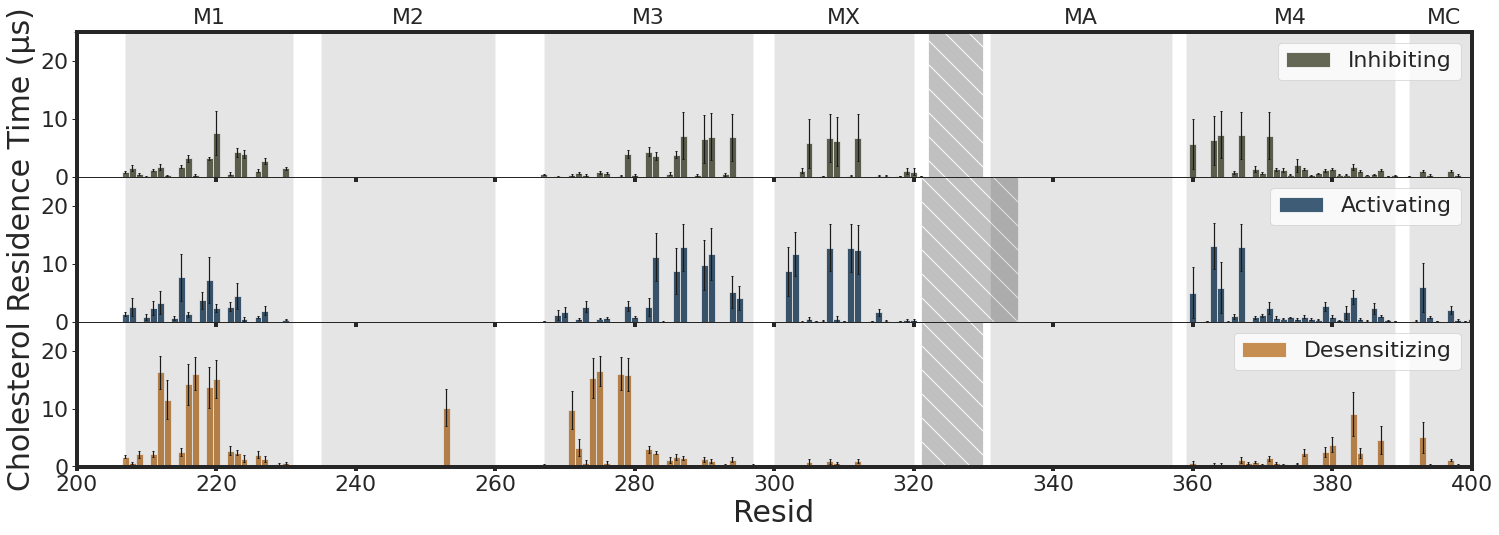

In [34]:
column = 'CHOL_residence'
fig = plt.figure(figsize = (25,8))
ax_whole = fig.add_subplot(111)
axes = []
axes.append(fig.add_subplot(313, sharex=ax_whole, sharey=ax_whole))
axes.append(fig.add_subplot(312, sharex=axes[0], sharey=axes[0]))
axes.append(fig.add_subplot(311, sharex=axes[0], sharey=axes[0]))

#axes = plt.subplots(nrows=3, ncols = 1)

for (system, md_data_sys), ax, color, label in zip(md_data.groupby(['system']), axes, palette, labels):

    resid_selection = np.arange(1,402)
    df = md_data_sys[md_data_sys.resid.isin(resid_selection)]
    resid_plot = list(set(df['resid']))
    mean = df.groupby(['resid']).mean()[column]
    sem = df.groupby(['resid']).sem()[column]

    ax.bar(resid_plot, mean, yerr=sem,capsize=1,width=0.99, color=color, label=label)
#    sns.barplot(data=df,
#                x='resid',
#                y='CHOL_residence',
#                capsize = 1,
#                ax=ax)
#    ax.set_xlim(100,402)


    all_resids = np.arange(1,403)
    plot_resids = np.array(list(set(df['resid'])))
    empty_site = np.setdiff1d(all_resids, plot_resids)
    break_points = np.arange(len(empty_site)-1)[np.diff(empty_site) !=1]
    #break_points = empty_site[:-1][np.diff(empty_site) !=1]

    #break_points = np.insert(break_points, 0, empty_site[0], axis=0)
    gray_areas = []
    if break_points.any():
        gray_areas.append([empty_site[0],empty_site[break_points[0]]])
        gray_areas.append([401,500])

        for ind, break_point in enumerate(break_points[:-1]):
            gray_areas.append([empty_site[break_point+1],empty_site[break_points[ind+1]]])
    else: 
        gray_areas.append([empty_site[0],empty_site[-1]])
        gray_areas.append([401,500])

    for gray_area in gray_areas:
        ax.axvspan(gray_area[0], gray_area[1], facecolor="#c0c0c0", alpha=1, hatch="\\")
    ax.set_xlim(200,400)
    ax.set_ylim(0,25)
    ax.yaxis.set_minor_locator(MultipleLocator(25))
    ax.yaxis.set_major_locator(MultipleLocator(10))

    #ax.set_ylabel('Cholesterol Duration Time (us)')

    ax.legend(loc=1)
    two_shades = ['#000000', '#c0c0c0']
    for ind, domain in enumerate(domain_annotations_plot.items()):
        ax.axvspan(domain[1][0], domain[1][-1], facecolor=two_shades[0], alpha=0.1)
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.xaxis.set_tick_params(width=4)

ax2 = ax_whole.twiny()
ax2.set_xlabel('')  # we already handled the x-label with ax1
ax2.tick_params(axis='x',direction='in')
ax2.set_xlim(200,400)

ax2.spines['top'].set_linewidth(4)
ax2.spines['right'].set_linewidth(4)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_linewidth(4)

ax2.xaxis.set_tick_params(width=0)
ax2.set_xticks([np.mean(domain[1]) for domain in domain_annotations_plot.items()])
ax2.set_xticklabels([domain[0] for domain in domain_annotations_plot.items()])

ax_whole.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax_whole.set_xlabel('Resid', fontsize=30)
ax_whole.set_ylabel('Cholesterol Residence Time (μs)', fontsize=30)
#ax_whole.set_ylabel(' '.join(column.split('_')) +  ' time (μs)')

fig.subplots_adjust(hspace=0)
plt.setp(axes[1].get_xticklabels(), visible=False)
plt.setp(axes[2].get_xticklabels(), visible=False)    
plt.savefig('Figures/chol_residence.pdf',bbox_inches = 'tight', pad_inches=0.1, transparent=True)